#USA CAR DATASET ANALYSIS

## Analysed by
Daniel Mathenge Kamuthu

##Dataset Background

This dataset contains information about Vehicles in USA.
##Dataset columns Descriptions

*  price: Indicates the price of the vehicle in USD.
* brand: The make or manufacturer of the vehicle (e.g., Toyota, Ford).
* model: The specific model of the vehicle (e.g., Cruiser, Malibu).
* year: The manufacturing year of the vehicle.
* title_status: The status of the vehicle's title, such as "clean vehicle," indicating no significant legal issues or damage reported.
* mileage: The total mileage of the vehicle, representing how much it has been driven.
* color: The exterior color of the vehicle.
* vin: The Vehicle Identification Number, a unique identifier for each vehicle.
* lot: Likely represents the auction lot number where the vehicle is listed.
* state: The U.S. state where the vehicle is located.
* country: The country where the vehicle is located, in this case, "USA" for all entries.
* condition: Indicates the time left for the sale or auction (e.g., "10 days left").





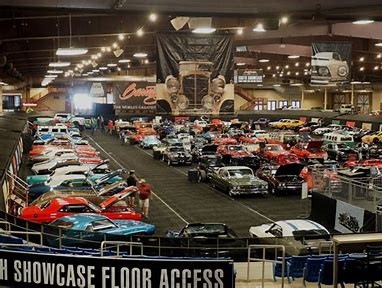

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head(14)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
price,0
brand,0
model,0
year,0
title_status,0
mileage,0
color,0
vin,0
lot,0


There are no null values

In [ ]:
df.shape

(2499, 13)

## This dataset has 2,499 rows and 13 columns

#Data Validation

In [ ]:
# Ensure correct data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['lot'] = pd.to_numeric(df['lot'], errors='coerce')

## handle missing values

In [ ]:
print("Missing Values:\n", df.isnull().sum())
df = df.dropna()  # Drop rows with missing values


Missing Values:
 Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


In [ ]:
# Convert 'condition' to numeric (hours left)
def convert_condition_to_hours(condition):
    if "days" in condition:
        return int(condition.split()[0]) * 24
    elif "hours" in condition:
        return int(condition.split()[0])
    return np.nan

df['condition_hours_left'] = df['condition'].apply(convert_condition_to_hours)


## Check for outliers

In [ ]:
def detect_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers_price = detect_outliers('price')
outliers_mileage = detect_outliers('mileage')


In [ ]:
# Drop the specified columns
df = df.drop(['condition','model', 'lot', 'vin','model','country'], axis=1)



*   Condition has been transformed into a more usable numerical column


*   Model It might also contain inconsistencies (e.g., generic values like "door") that require extra cleaning.
*   Lot It seems to represent an internal identifier for vehicle inventory, which isn't relevant for price, mileage, or other analysis.


*   The vin column is a unique identifier for each vehicle and is primarily useful for deduplication or tracking. Once duplicates are removed, it becomes unnecessary for further analysis.
*   All values in the country column are the same "usa", therefore this column is redundant





In [ ]:
Cleaned_df = df
Cleaned_df

,Unnamed: 0,price,brand,year,title_status,mileage,color,state,condition_hours_left
0,0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,240.0
1,1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,144.0
2,2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,48.0
3,3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,22.0
4,4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,22.0
...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,2019,clean vehicle,23609.0,red,california,24.0
2495,2495,9200,nissan,2018,clean vehicle,34553.0,silver,florida,21.0
2496,2496,9200,nissan,2018,clean vehicle,31594.0,silver,florida,21.0
2497,2497,9200,nissan,2018,clean vehicle,32557.0,black,florida,48.0


In [ ]:
# summary statistics
Cleaned_df.describe()

,Unnamed: 0,price,year,mileage,condition_hours_left
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2425.000000
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,56.451546
std,721.543484,12116.094936,3.442656,5.970552e+04,61.304623
min,0.000000,0.000000,1973.000000,0.000000e+00,1.000000
25%,624.500000,10200.000000,2016.000000,2.146650e+04,21.000000
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,48.000000
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,48.000000
max,2498.000000,84900.000000,2020.000000,1.017936e+06,360.000000


# Singe Variate Analysis

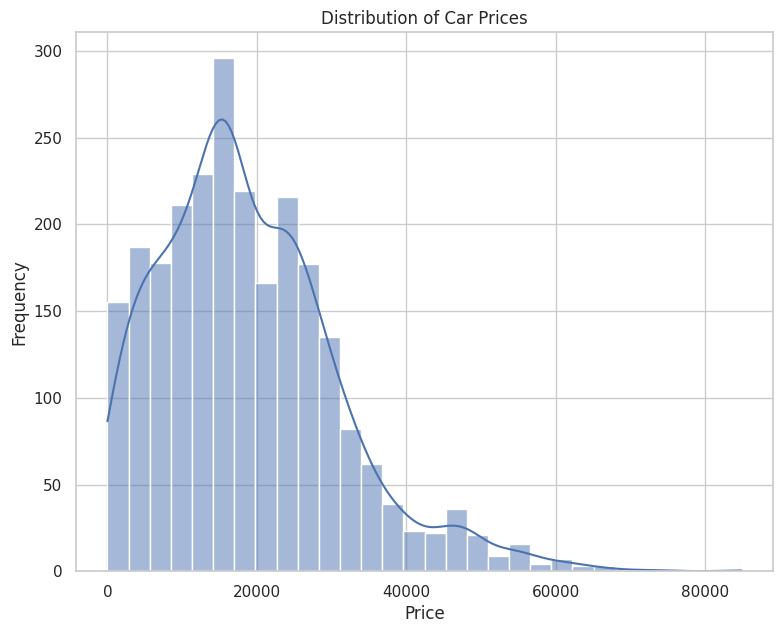

In [ ]:

plt.figure(figsize=(9, 7))
sns.histplot(Cleaned_df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram above is skewed to the right, most of the car prices range between 0 to 40000, there are also outliers

## Price by Year


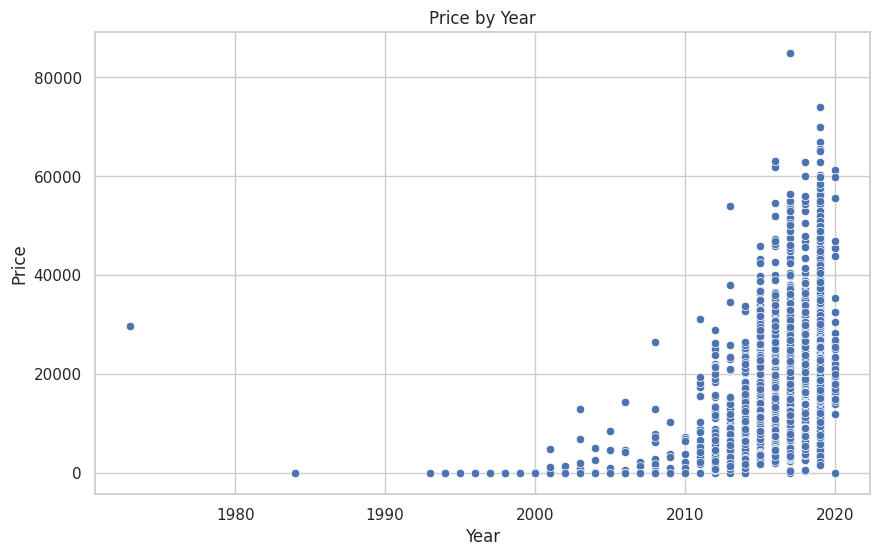

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Cleaned_df, x='year', y='price')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

This scatter chat shows that as the years approach 2020, the vehicle prices also increase, we also notice an increased in the number of vehicles between the year of 2000 to 2020.


# 2. Mileage Analysis


## Mileage Distribution


In [ ]:
import plotly.express as px

fig = px.histogram(Cleaned_df, x='mileage', nbins=30, title='Vehicle Mileage Distribution')
fig.update_layout(xaxis_title='Mileage', yaxis_title='Frequency')
fig.show()

This histogram is skewed to the right indicating that most vehicles have maliage less that 200,000 miles,
vehicle that have 0-50k have the highest count of 1711,

## Mileage vs. Price


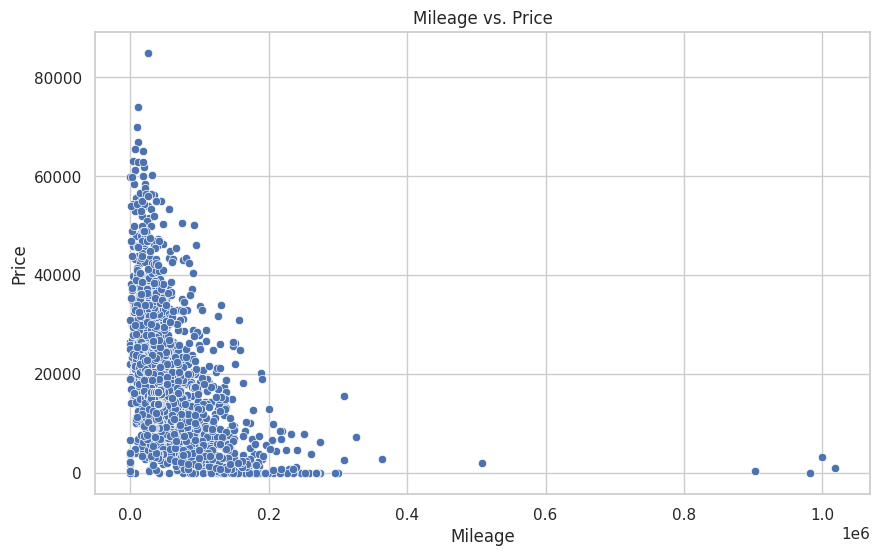

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Cleaned_df, x='mileage', y='price')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

low maliage vehicle fetch high prices, the scatter plot shows that vehicles with less than 200,000 miles have high prices.


## Mileage by Year


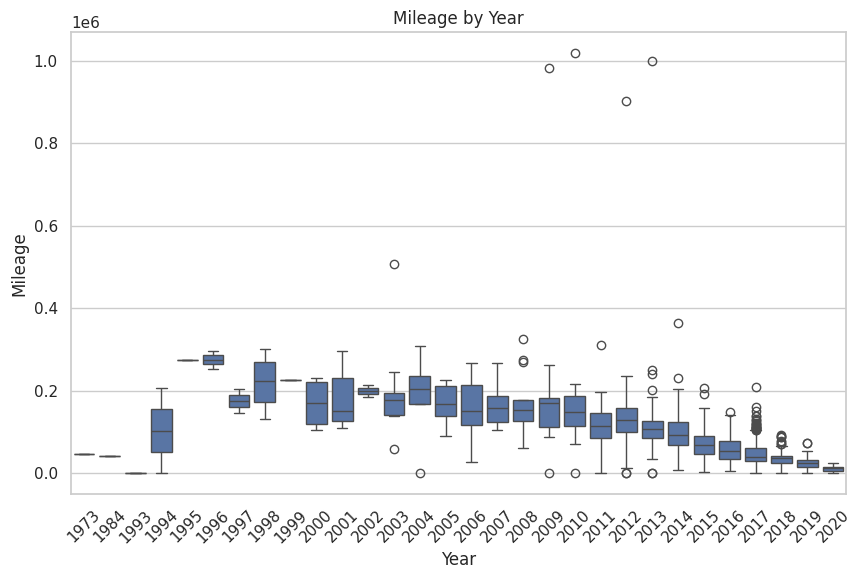

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Cleaned_df, x='year', y='mileage')
plt.xticks(rotation=45)
plt.title('Mileage by Year')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()


This box plot suggest that vehicles between 1994 and 2008 had higher mileage compared to vehicles between 2011 to 2020, it is evident that the median value of the mileage decreases as the years approach, 2020. there could be several factors that cause this.

*   Emergence of new automobiles people increasingly want newer models
*   Emission Standars regulation impact the vehicle designs


*   Changes in driving habits and urbanization
*   fuel types





## Correlation Analysis

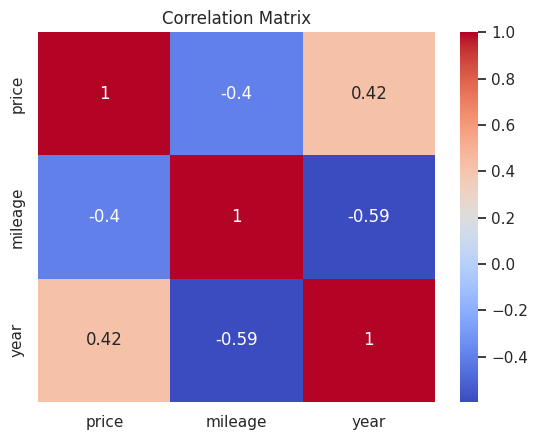

In [ ]:
correlation = Cleaned_df[['price', 'mileage', 'year']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is a week positive correlation between price and year of (0.42), while there is is a strong negative correlation between price and mileage, milage and year have a stong negative correlation of -0.59

## Category analysis

In [ ]:
Top_brands = Cleaned_df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-26-5b01799bbdcf>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-5b01799bbdcf>:14: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



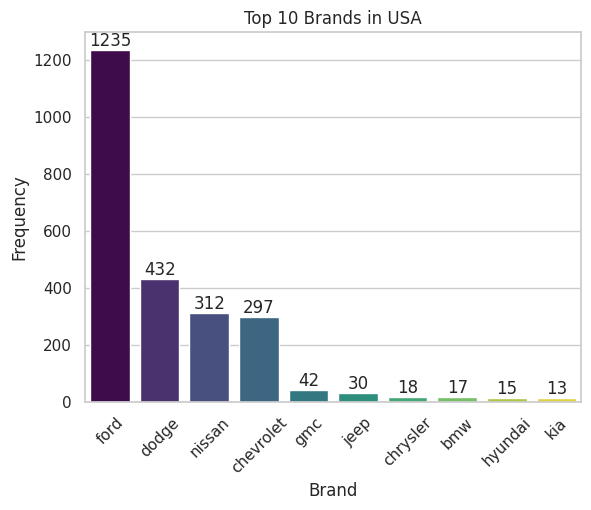

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_colors = len(Top_brands)
plt.title('Top 10 Brands in USA')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
colors = cm.viridis(np.linspace(0, 1, num_colors))

# Call sns.barplot before accessing ax.containers
sns.barplot(x=Top_brands.index, y=Top_brands.values, palette=colors)

# Create an Axes object using plt.gca()
# and assign to the variable 'ax' before using it.
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)  # Add data labels to each container individually

plt.show()

This bar chart shows a list of top 10 brand vehicles in america, Ford takes the first spot, this attributes to the fact that it is an american auto manufucturer. Companies like Toyota did not make the list it is worth investigating why.

## Geographic Analysis

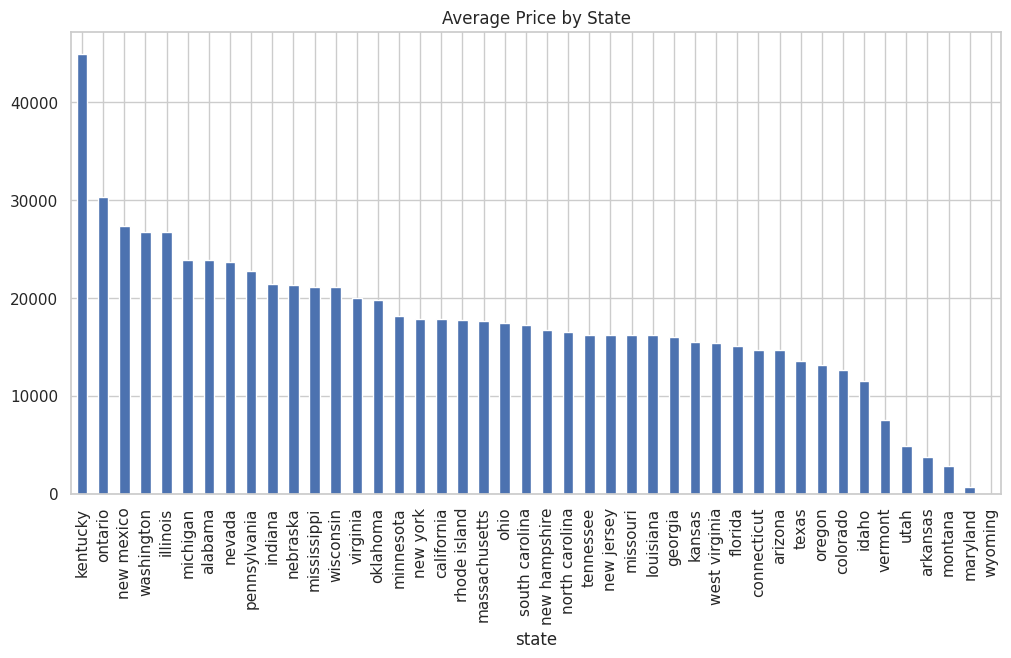

In [ ]:
state_avg_price = Cleaned_df.groupby('state')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_avg_price.plot(kind='bar')
plt.title('Average Price by State')
plt.show()

Kentucky has the highest average vehicle price of over  40,000 it is followed by ontario at 30,000

## Vehicle status analysis

In [42]:
Cleaned_df

,Unnamed: 0,price,brand,year,title_status,mileage,color,state,condition_hours_left
0,0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,240.0
1,1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,144.0
2,2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,48.0
3,3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,22.0
4,4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,22.0
...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,2019,clean vehicle,23609.0,red,california,24.0
2495,2495,9200,nissan,2018,clean vehicle,34553.0,silver,florida,21.0
2496,2496,9200,nissan,2018,clean vehicle,31594.0,silver,florida,21.0
2497,2497,9200,nissan,2018,clean vehicle,32557.0,black,florida,48.0


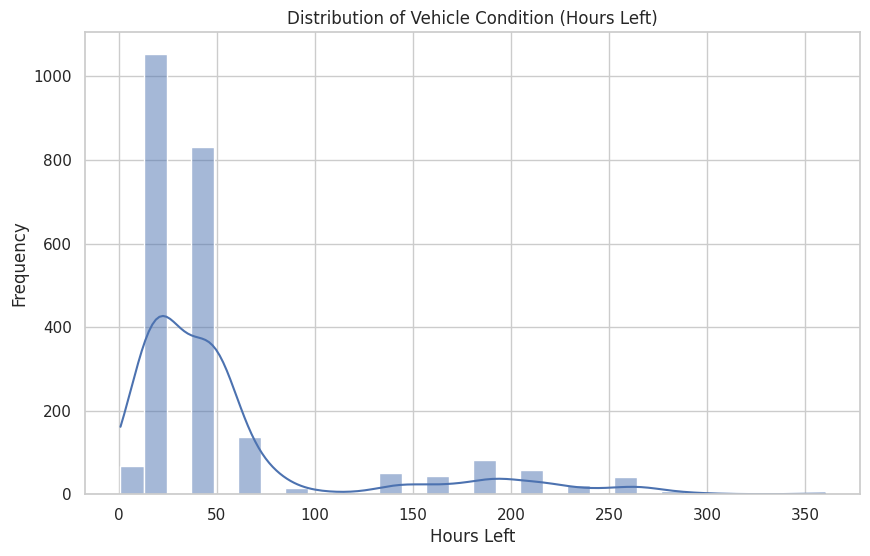

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(Cleaned_df['condition_hours_left'], bins=30, kde=True)
plt.title('Distribution of Vehicle Condition (Hours Left)')
plt.xlabel('Hours Left')
plt.ylabel('Frequency')
plt.show()





The distribution is skewed to the right this indicates that most vehicles are sold within the first 75 hrs.

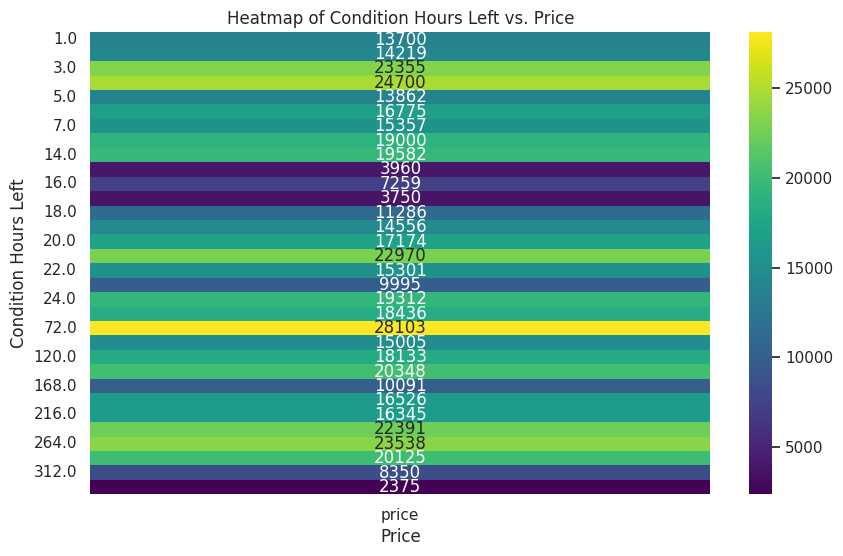

In [44]:
# prompt: create a heat map  of condition hour aganist price

plt.figure(figsize=(10, 6))
sns.heatmap(Cleaned_df.pivot_table(values='price', index='condition_hours_left', aggfunc='mean'), annot=True, cmap='viridis', fmt=".0f")
plt.title('Heatmap of Condition Hours Left vs. Price')
plt.xlabel('Price')
plt.ylabel('Condition Hours Left')
plt.show()

The heat map suggest that vehicles that have action hours less that 15hrs fetch better prices, although there are other hours such as 22, 72, and 264 that have also fetched better prices

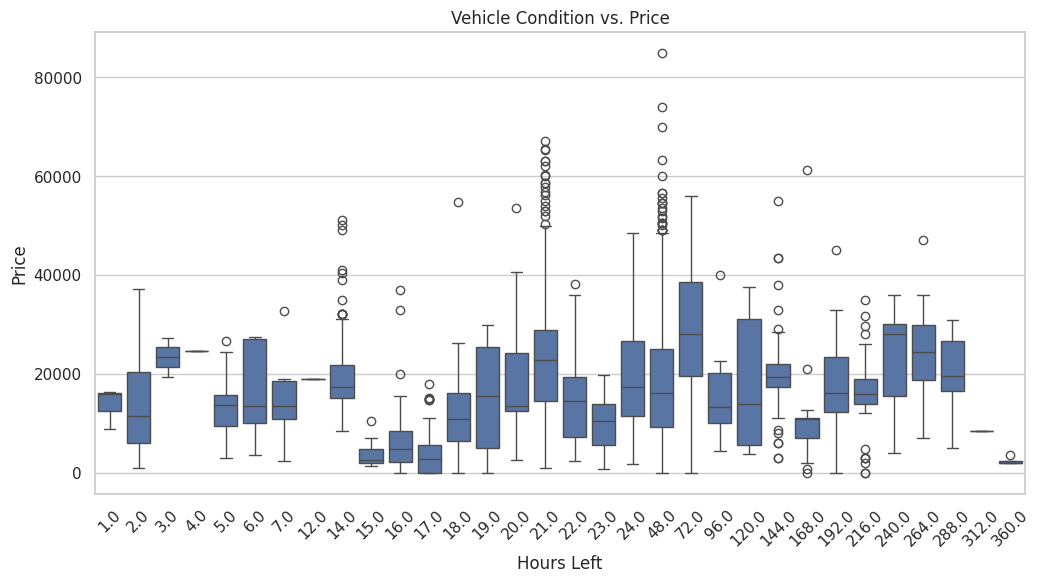

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=Cleaned_df, x='condition_hours_left', y='price')
plt.title('Vehicle Condition vs. Price')
plt.xticks(rotation=45)
plt.xlabel('Hours Left')
plt.ylabel('Price')
plt.show()

# Title Status

                          price                          
                           mean   median min    max count
title_status                                             
clean vehicle      19914.439640  17999.5   0  84900  2336
salvage insurance   2333.006135    825.0   0  20000   163


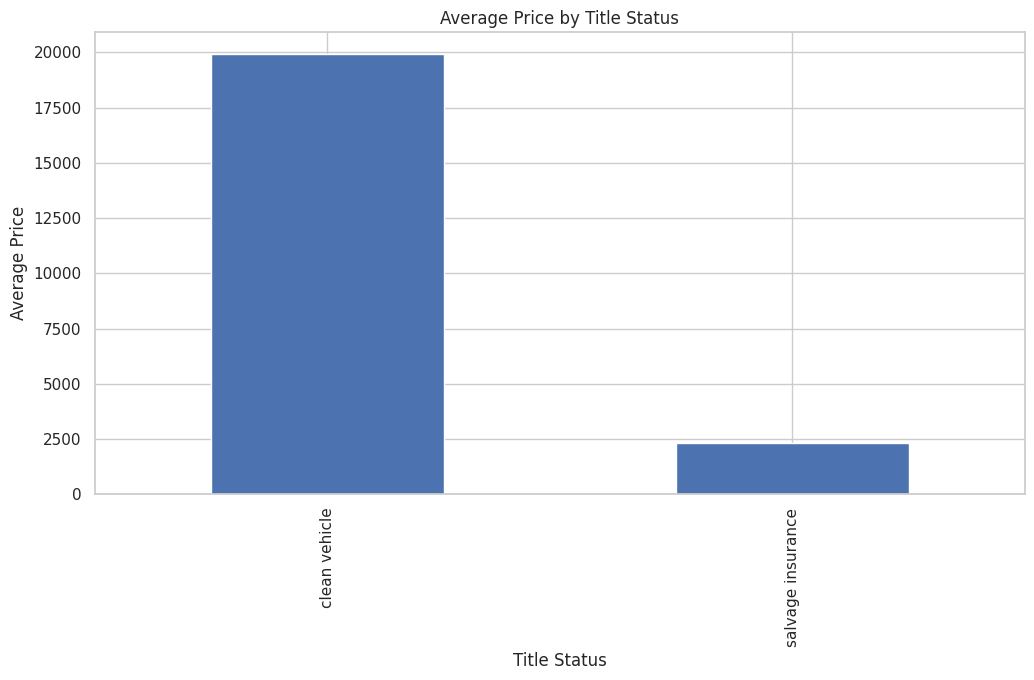

In [ ]:


# Group data by vehicle status ('condition_hours_left') and calculate summary statistics
grouped_by_status = Cleaned_df.groupby('title_status').agg({
    'price': ['mean', 'median', 'min', 'max', 'count']
})

# Display the summary statistics for each vehicle status group
print(grouped_by_status)

# Plot the average price for each vehicle status group
plt.figure(figsize=(12, 6))
grouped_by_status['price']['mean'].plot(kind='bar')
plt.title('Average Price by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Average Price')
plt.show()

Clean Vehicle fetch the highest prices in the market, the average mean price of clean vehicles is 19,914 while that of salvage Insurance is 2,333. the difference is 8 times that clean vehicle.

                            mean    median  min        max
title_status                                              
clean vehicle       45339.738442   34151.0  0.0   999999.0
salvage insurance  152029.361963  137422.0  0.0  1017936.0


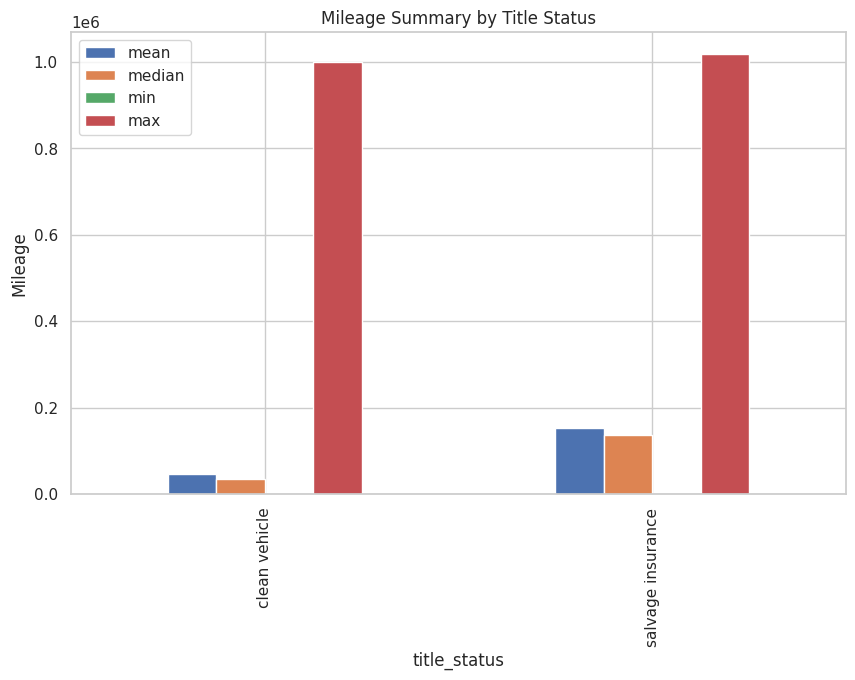

In [ ]:

# Group mileage by title_status
mileage_by_title_status = Cleaned_df.groupby('title_status')['mileage'].agg(['mean', 'median', 'min', 'max'])

# Display the results
print(mileage_by_title_status)

# Plot the results (optional)
mileage_by_title_status.plot(kind='bar', figsize=(10, 6))
plt.title('Mileage Summary by Title Status')
plt.ylabel('Mileage')
plt.show()

Salvage insurance vehicles have higher miliage compared to clean vehicle. The median value of clean vehicle is 34151, while that of salvage insurance is 137422. the average mean mileage of clean vehicle is 45339, on the other hand salvage insurance has an average mean mileage of 152029.


*   this values explains why most insurance salvage vehicles fetchs low prices at the auction.




#Key Insights

##Price Trends:

* Vehicle prices are positively correlated with the manufacturing year (newer vehicles cost more).
There is a strong negative correlation between mileage and price, indicating that vehicles with lower mileage tend to fetch higher prices.
* Clean vehicles fetch significantly higher prices than salvage insurance vehicles, with an 8x difference in mean price.
## Mileage Analysis:

* The majority of vehicles have mileage below 200,000, with the highest concentration between 0–50,000 miles.
* Older vehicles (1994–2008) tend to have significantly higher mileage compared to newer vehicles (2011–2020), which reflects trends in consumer behavior and technological advancements in newer cars.
##Top Brands:

* Ford dominates the market in terms of vehicle count. This aligns with its status as a prominent American manufacturer.
Brands like Toyota and Honda are notably absent from the top 10, suggesting they may occupy a niche or underrepresented segment in this dataset.
Geographic Trends:

* Kentucky has the highest average vehicle prices, followed by Ontario. These trends could reflect regional demand, income levels, or availability of premium vehicles in these states.
Vehicle Condition:

*  Vehicles with fewer hours left in their auction condition tend to be priced higher, possibly reflecting urgency or competition in the bidding process.
Clean vehicles, on average, have much lower mileage than salvage vehicles, which is consistent with their higher prices

# Recommendations

##For Buyers:

* Focus on vehicles with moderate mileage (e.g., 50,000–150,000) and a clean title status for a good balance between cost and quality.
* Consider geographic pricing trends; buying from states with lower average prices (e.g., Texas or Georgia) may offer savings.
##For Sellers:

* Highlight the title status (e.g., clean vehicle) and provide detailed mileage data, as these are key determinants of price.
* If possible, improve the vehicle's condition and reduce mileage through servicing to increase auction bids.
##For Auction Platforms:

* Ensure transparency and emphasize clean title vehicles to attract more buyers and justify higher price ranges.
* Invest in analytics to identify trends in specific regions or brands to tailor marketing strategies effectively.
##Further Research:

* Investigate why certain brands, such as Toyota and Honda, are underrepresented in the dataset and analyze whether this is a data bias or a reflection of actual market conditions.
* Explore differences in buyer behavior across different states or brands for more localized insights.
# Operational Strategy:

* Focus on optimizing auction timelines for vehicles in better condition, as fewer hours left in auctions are correlated with higher prices.
* Develop strategies to refurbish salvage vehicles to improve their resale value, particularly in terms of mileage and appearance.

# Conclusion
This dataset provides valuable insights into the U.S. vehicle market, including the impact of mileage, year, and condition on price. For stakeholders, understanding these dynamics can inform smarter buying, selling, and operational strategies, driving more value across the automotive sales ecosystem.